In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plot
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

            exam1       exam2    decision
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


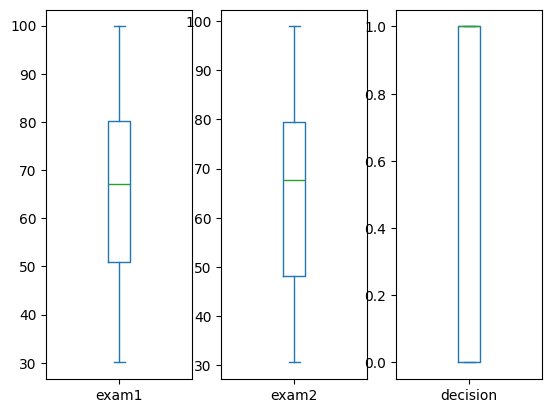

In [5]:
data = pandas.read_csv('acceptance_data.txt', names = ['exam1','exam2','decision'])

# 1. Analyze the dataset
print(data.describe())
data.plot(kind='box', subplots=True)
plot.show()

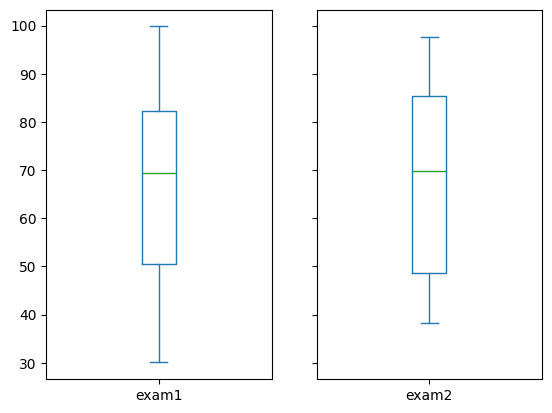

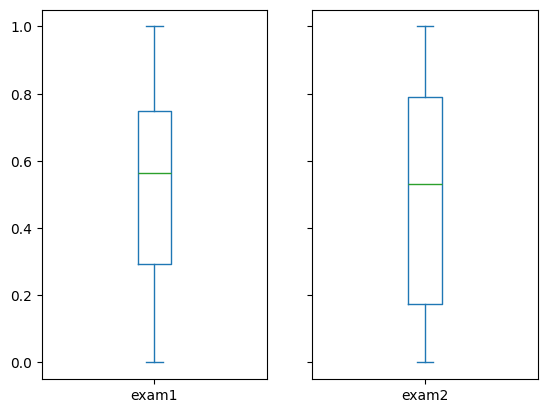

In [7]:
# 2. Perform data preprocessing & Split the data into train and test sets
X = data.drop(columns=['decision']).round(2)
y = data['decision']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

X_train.plot(kind='box', subplots=True, sharey=True)
plot.show()

# Min-Max Scaling
xmin = X_train.min()
xmax = X_train.max()
X_train = (X_train - xmin) / (xmax- xmin)
X_test = (X_test - xmin) / (xmax - xmin)

X_train.plot(kind='box', subplots=True, sharey=True)
plot.show()

X_train = X_train.to_numpy().reshape((-1,2))
X_test = X_test.to_numpy().reshape((-1,2))
y_train = y_train.to_numpy() 
y_test = y_test.to_numpy()

In [8]:
# 4. Fit the logistic regression model to the training data
model = linear_model.LogisticRegression(solver='sag')
model.fit(X_train, y_train)

print('Coefficients: \n', model.coef_, " ", model.intercept_)

Coefficients: 
 [[2.9020355  2.32216034]]   [-2.10520198]


In [9]:
# 5. Evaluate the fitted model on the test data

y_pred = model.predict(X_test)
print('Correct predicitions ratio: %.2f'% model.score(X_test, y_test))

Correct predicitions ratio: 0.88


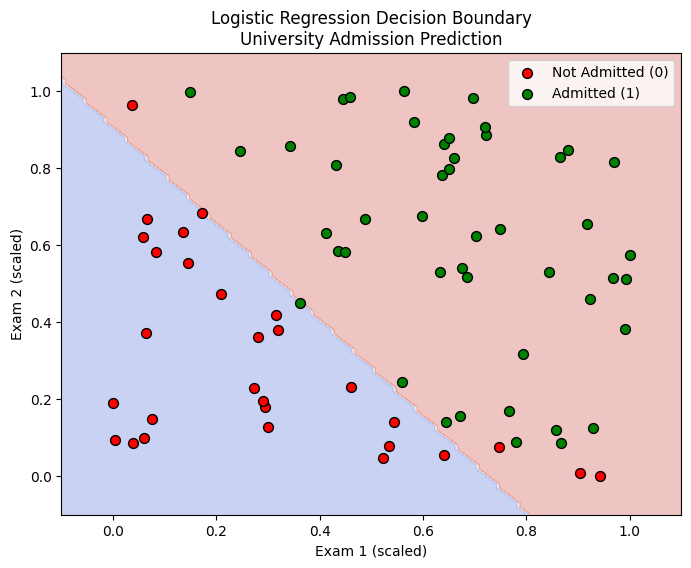

In [10]:
# 6. Visualize Decision Boundary

# Create a mesh grid for plotting
x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each grid point
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot training points
plt.scatter(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0],
            c='red', edgecolors='k', label='Not Admitted (0)', s=50)
plt.scatter(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1],
            c='green', edgecolors='k', label='Admitted (1)', s=50)

plt.xlabel('Exam 1 (scaled)')
plt.ylabel('Exam 2 (scaled)')
plt.legend()
plt.title('Logistic Regression Decision Boundary\nUniversity Admission Prediction')
plt.show()

In [11]:
# 6. Generate predictions for new data
new_x = [75,82]
model.predict([(new_x-xmin)/(xmax-xmin)])

array([1])